# Pacotes necessários e ELT

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
from matplotlib.backends.backend_pdf import PdfPages # Salvar como PDF
from matplotlib.ticker import MaxNLocator

### Fazer upload  de arquivo

In [10]:
df = pd.read_csv('MonitoramentoEDiagns_DATA_2024-11-27_1052.csv')
df.head()

,record_id,visit_date,institution_name,postal_code,address,interviewed,residents_number,residents_bedroom,vehicle,normal_ilpi,...,internship_institution_3,internship_institution_4,internship_course,internship_course_2,internship_course_3,internship_course_4,regulao_complete,comments,comments_type,encerramento_complete
0,1,2024-10-29 09:19,2,74971451,"Rua José Leão Souza Filho, 122, Jardim Riviera...",Gleiciane Maria da Silva - responsável técnica,72,2,1,1,...,Não se aplica,Não se aplica,Técnico de Enfermagem,Não se aplica,Não se aplica,Não se aplica,2,1,As insatisfações com o município são enormes. ...,2
1,2,2024-10-29 13:38,3,74980050,"Rua Onze de Maio, S/N, Setor Central, Aparecid...","Luciane Aparecida das Chagas - coproprietária,...",19,2,2,1,...,Não se aplica,Não se aplica,Técnico de Enfermagem,Não se aplica,Não se aplica,Não se aplica,2,1,- Solicitam da equipe de pesquisa para a orga...,2
2,3,2024-11-05 13:19,4,74913510,"Rua Igarapé, S/N, Qd. 40, Lt. 02 a 04, Vila Al...",Eleny Lopes Rosa - Responsável Técnico,34,2,1,1,...,SESC,Não se aplica,Fisioterapia e Nutrição,Psicologia e Medicina,Cuidadores de idosos,Não se aplica,2,1,- Há irregularidades no fornecimento de frald...,2
3,4,2024-11-05 07:50,1,74920784,"Rua 15 de março, Qd. 3, Lt. 4, S/N, Parque Fla...",Antônio Gonçalves da Silva - responsável,18,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,Omissão do Estado,2
4,5,2024-10-11 14:30,5,74943150,"Avenida Graça Aranha, Qd. E, Lt. 15, Nova Bras...",Ludmila Ozan - responsável técnica,41,2,1,1,...,Não se aplica,Não se aplica,Psicologia,Não se aplica,Não se aplica,Não se aplica,2,1,Falta articulação com a rede de atenção à saúd...,2


In [17]:
# Suprimindo colunas
df = df.drop(columns=['record_id', 'caracterizao_da_ilpi_complete', 'profissionais_da_ilpi_complete', 'segurana_e_ambiente_complete', 'organizao_da_farmcia_complete',
                      'servio_lavanderia_complete', 'processos_de_cuidado_complete', 'regulao_complete', 'encerramento_complete'])
df

,visit_date,institution_name,postal_code,address,interviewed,residents_number,residents_bedroom,vehicle,normal_ilpi,nurse_aux,...,internship_institution,internship_institution_2,internship_institution_3,internship_institution_4,internship_course,internship_course_2,internship_course_3,internship_course_4,comments,comments_type
0,2024-10-29 09:19,2,74971451,"Rua José Leão Souza Filho, 122, Jardim Riviera...",Gleiciane Maria da Silva - responsável técnica,72,2,1,1,0.0,...,Colégio Suldamérica,Não se aplica,Não se aplica,Não se aplica,Técnico de Enfermagem,Não se aplica,Não se aplica,Não se aplica,1,As insatisfações com o município são enormes. ...
1,2024-10-29 13:38,3,74980050,"Rua Onze de Maio, S/N, Setor Central, Aparecid...","Luciane Aparecida das Chagas - coproprietária,...",19,2,2,1,0.0,...,Genotec-Genoma,Não se aplica,Não se aplica,Não se aplica,Técnico de Enfermagem,Não se aplica,Não se aplica,Não se aplica,1,- Solicitam da equipe de pesquisa para a orga...
2,2024-11-05 13:19,4,74913510,"Rua Igarapé, S/N, Qd. 40, Lt. 02 a 04, Vila Al...",Eleny Lopes Rosa - Responsável Técnico,34,2,1,1,1.0,...,Universidade Paulista,Centro Universitário Alfredo Nasser,SESC,Não se aplica,Fisioterapia e Nutrição,Psicologia e Medicina,Cuidadores de idosos,Não se aplica,1,- Há irregularidades no fornecimento de frald...
3,2024-11-05 07:50,1,74920784,"Rua 15 de março, Qd. 3, Lt. 4, S/N, Parque Fla...",Antônio Gonçalves da Silva - responsável,18,2,2,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Omissão do Estado
4,2024-10-11 14:30,5,74943150,"Avenida Graça Aranha, Qd. E, Lt. 15, Nova Bras...",Ludmila Ozan - responsável técnica,41,2,1,1,0.0,...,UNIP,Não se aplica,Não se aplica,Não se aplica,Psicologia,Não se aplica,Não se aplica,Não se aplica,1,Falta articulação com a rede de atenção à saúd...


# Distribuíção de Residentes nas ILPI's

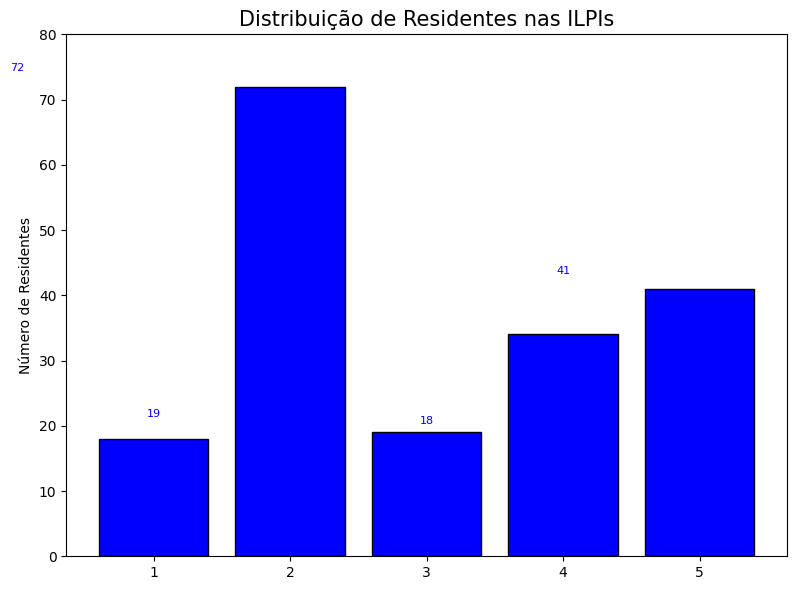

In [19]:
# Gráfico Distribuição de Residentes

# Ajusta o tamanho do gráfico (largura, altura)
plt.figure(figsize=(8, 6))

# Cria o gráfico de barras
plt.bar(x=df['institution_name'], height=df['residents_number'], color='blue', edgecolor='black')
plt.title('Distribuição de Residentes nas ILPIs', fontsize=15)
plt.ylabel('Número de Residentes')
#plt.xticks(ha='right', fontsize=10)  # Reduzindo a fonte do eixo X

# Define as divisões de 10 em 10, de 0 até 80
plt.ylim(0, 80)
plt.yticks(np.arange(0, 81, 10))

# Adicionando os valores das barras e ajustando a distância (v + 2) conforme necessário
for i, v in enumerate(df['residents_number']):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=8, color='blue')

plt.tight_layout()
plt.savefig('distribuicao_residentes.png')
plt.show()

In [26]:
# Criar uma conexão com o arquivo SQLite
db_file = 'research_data.db'  # Caminho para o arquivo .db
conn = sqlite3.connect(db_file)

In [27]:
# Cria tabela (se não existir) e inserir os dados do DataFrame
df.to_sql('research_data', conn, if_exists='replace', index=False)

# Cria um objeto cursor
cursor = conn.cursor()

# Executa a query para gerar o número de respostas da
cursor.execute("SELECT COUNT(*) FROM research_data")
count = cursor.fetchone()[0]

print(f"Número respostas na base de dados: {count}")

Número respostas na base de dados: 5


# Disposição das camas dos residentes de acordo com a norma

In [28]:
# Query para Camas dos Residentes estarem de acordo com a norma
query_bed = """
SELECT institution_name
FROM research_data
WHERE residents_bedroom = 1;
"""

In [29]:
# Executar a query e carregar o resultado em um DataFrame
df_bed = pd.read_sql_query(query_bed, conn)
df_bed

,institution_name


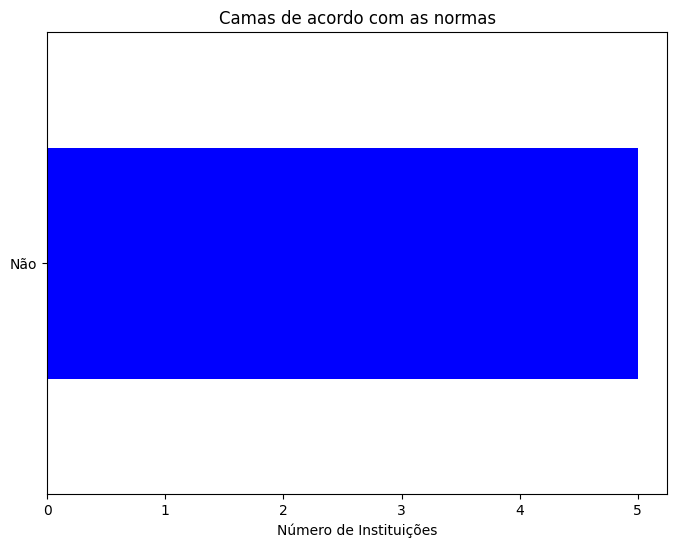

In [30]:
# Gráfico Camas de acordo com norma

# Ajusta o tamanho do gráfico (largura, altura)
plt.figure(figsize=(8, 6))

# Mapeando 1 e 2 para "Sim" e "Não"
df_filtered = df['residents_bedroom'].map({1: 'Sim', 2: 'Não'})

# Contando os valores
counts = df_filtered.value_counts()

# Criando o gráfico de barras horizontais
counts.plot(kind='barh', color=['blue', 'orange'])

# Garantir que o eixo X seja inteiro
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionando título e rótulos
plt.title('Camas de acordo com as normas')
plt.xlabel('Número de Instituições')
plt.ylabel('')

# Exibindo o gráfico
plt.savefig('camas_norma.png')
plt.show()

## Veículo de propriedade/disposição da ILPI

In [31]:
# Query para existencia de veículos
query_vehicle = """
SELECT institution_name
FROM research_data
WHERE vehicle = 1
"""

In [32]:
# Executar a query e carregar o resultado em um DataFrame
df_vehicle = pd.read_sql_query(query_vehicle, conn)
df_vehicle

,institution_name
0,2
1,4
2,5


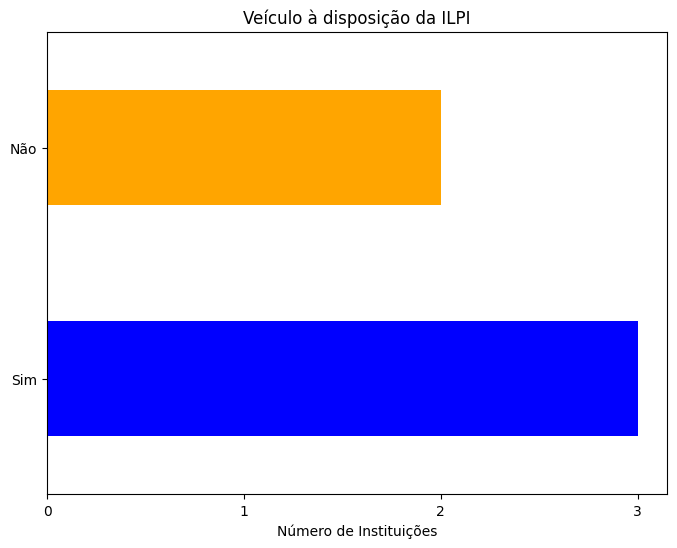

In [33]:
# Gráfico veículos

# Ajusta o tamanho do gráfico (largura, altura)
plt.figure(figsize=(8, 6))

# Mapeando 1 e 2 para "Sim" e "Não"
df_filtered = df['vehicle'].map({1: 'Sim', 2: 'Não'})

# Contando os valores
counts = df_filtered.value_counts()

# Criando o gráfico de barras horizontais
counts.plot(kind='barh', color=['blue', 'orange'])

# Garantir que o eixo X seja inteiro
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionando título e rótulos
plt.title('Veículo à disposição da ILPI')
plt.xlabel('Número de Instituições')
plt.ylabel('')

# Exibindo o gráfico
plt.savefig('veiculos.png')
plt.show()

# Profissionais das ILPI's

In [34]:
# Query profissionais e dias trabalhados por mes por ILPI
query_prof = """
SELECT
    institution_name AS ILPI,
    profissional,
    dias_por_mes
FROM (
    SELECT institution_name, 'Aux.Enfermagem' AS profissional, days_per_month_na AS dias_por_mes FROM research_data WHERE nurse_aux >= 1
    UNION ALL
    SELECT institution_name, 'Téc.Enfermagem' AS profissional, days_per_month_nt AS dias_por_mes FROM research_data WHERE nurse_tech >= 1
    UNION ALL
    SELECT institution_name, 'Enfermeiro(a)' AS profissional, days_per_month_n AS dias_por_mes FROM research_data WHERE nurse >= 1
    UNION ALL
    SELECT institution_name, 'Fisio' AS profissional, days_per_month_physio AS dias_por_mes FROM research_data WHERE physiotherapist >= 1
    UNION ALL
    SELECT institution_name, 'Nutricionista' AS profissional, days_per_month_nutrit AS dias_por_mes FROM research_data WHERE nutritionist = 1
    UNION ALL
    SELECT institution_name, 'Psicologo(a)' AS profissional, days_per_month_psicol AS dias_por_mes FROM research_data WHERE psicologist >= 1
    UNION ALL
    SELECT institution_name, 'Médico(a)' AS profissional, days_per_month_physician AS dias_por_mes FROM research_data WHERE physician >= 1
    UNION ALL
    SELECT institution_name, 'Ter.Ocupacional' AS profissional, days_per_month_occup AS dias_por_mes FROM research_data WHERE occup_therapist >= 1
    UNION ALL
    SELECT institution_name, 'Cuidador(a)' AS profissional, days_per_month_caregiver AS dias_por_mes FROM research_data WHERE caregiver = 1
    UNION ALL
    SELECT institution_name, 'Outros_prof_saúde' AS profissional, d_p_month_oth_health_prof AS dias_por_mes FROM research_data WHERE other_health_prof >= 1
    UNION ALL
    SELECT institution_name, 'Serv.Gerais' AS profissional, days_per_month_housekeep AS dias_por_mes FROM research_data WHERE housekeeping >= 1
    UNION ALL
    SELECT institution_name, 'Administrativo' AS profissional, days_per_month_staff AS dias_por_mes FROM research_data WHERE staff >= 1
) AS subquery_profissionais
WHERE dias_por_mes IS NOT NULL
ORDER BY institution_name, profissional;
"""

In [35]:
# Executar a query e carregar o resultado em um DataFrame
df_prof = pd.read_sql_query(query_prof, conn)

# Convertendo dias_por_mes para inteiro
df_prof['dias_por_mes'] = df_prof['dias_por_mes'].astype(int)

# Aplicando formatação para que a ILPI apareça uma vez
df_prof['ILPI'] = df_prof['ILPI'].mask(df_prof['ILPI'].duplicated())

# Substituindo NaN por strings vazias
df_prof['ILPI'] = df_prof['ILPI'].fillna('')

df_prof

,ILPI,profissional,dias_por_mes
0,1.0,Enfermeiro(a),0
1,,Médico(a),0
2,,Serv.Gerais,21
3,2.0,Administrativo,23
4,,Fisio,16
5,,Médico(a),0
6,,Nutricionista,4
7,,Outros_prof_saúde,2
8,,Psicologo(a),2
9,,Serv.Gerais,23


### Vinculo empregatício dos profissionais com a ILPI

In [36]:
# Query para vinculo empregatício
query_employ = """
SELECT
    institution_name,
    TRIM(
        CASE WHEN employment_relatioship___1 = 1 THEN 'CLT' ELSE '' END ||
        CASE WHEN employment_relatioship___2 = 1 THEN ', Contrato' ELSE '' END ||
        CASE WHEN employment_relatioship___3 = 1 THEN ', Voluntário' ELSE '' END,
        ', '
    ) AS vinculo_empregaticio
FROM
    research_data;
"""

In [37]:
# Executar a query e carregar o resultado em um DataFrame
df_employ = pd.read_sql_query(query_employ, conn)
df_employ

,institution_name,vinculo_empregaticio
0,2,"CLT, Contrato, Voluntário"
1,3,"CLT, Voluntário"
2,4,"CLT, Voluntário"
3,1,Contrato
4,5,"CLT, Voluntário"


## Plano/programa semanal de atividade física e reabilitação funciona

In [38]:
# Query para Sistemas de Segurança
query_plan = """
SELECT
    institution_name,
    TRIM(
        CASE WHEN physio_program___1 = 1 THEN 'melhoria do tônus muscular' ELSE '' END ||
        CASE WHEN physio_program___2 = 1 THEN ', equilíbrio funcionalidade motora' ELSE '' END ||
        CASE WHEN physio_program___3 = 1 THEN ', bem-estar geral com indicação dos destinatário' ELSE '' END ||
        CASE WHEN physio_program___4 = 1 THEN ', não existe plano' ELSE '' END,
        ', '
    ) AS plano_atividade_fisica
FROM
    research_data;
"""

In [39]:
# Executar a query e carregar o resultado em um DataFrame
df_plan = pd.read_sql_query(query_plan, conn)
df_plan

,institution_name,plano_atividade_fisica
0,2,"melhoria do tônus muscular, equilíbrio funcion..."
1,3,"melhoria do tônus muscular, equilíbrio funcion..."
2,4,"melhoria do tônus muscular, equilíbrio funcion..."
3,1,não existe plano
4,5,"melhoria do tônus muscular, equilíbrio funcion..."


## A orientação do fisioterapeuta ao cuidador está documentada para a execução de atividades simples de manutenção das capacidades funcionais

In [40]:
# Query para orientações do fisioterapeuta
query_orient = """
SELECT
    institution_name
FROM research_data
WHERE physio_instructions = 1;
"""

In [41]:
# Executar a query orientações do fisioterapeuta
df_orient = pd.read_sql_query(query_orient, conn)
df_orient

,institution_name


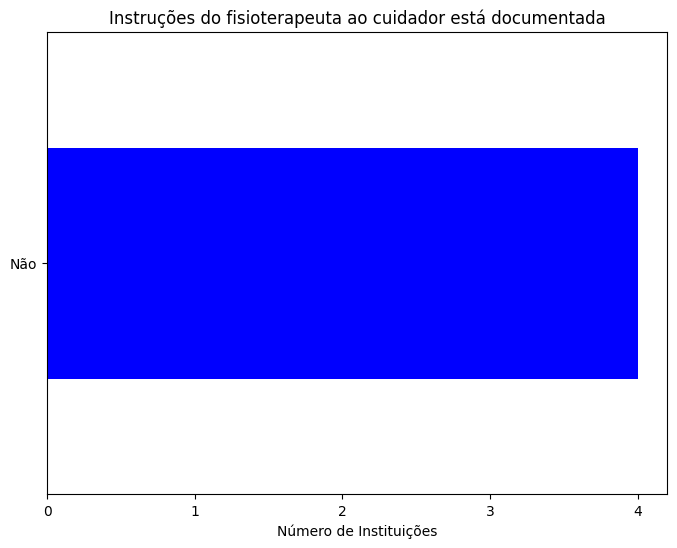

In [42]:
# Orientacao ao cuidador documentada

# Ajusta o tamanho do gráfico (largura, altura)
plt.figure(figsize=(8, 6))

# Mapeando 1 e 2 para "Sim" e "Não"
df_filtered = df['physio_instructions'].map({1: 'Sim', 2: 'Não'})

# Contando os valores
counts = df_filtered.value_counts()

# Criando o gráfico de barras horizontais
counts.plot(kind='barh', color=['blue', 'orange'])

# Garantir que o eixo X seja inteiro
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionando título e rótulos
plt.title('Instruções do fisioterapeuta ao cuidador está documentada')
plt.xlabel('Número de Instituições')
plt.ylabel('')

# Exibindo o gráfico
plt.savefig("instrucoes_fisio_cuidador_documentada")
plt.show()

# Segurança e Ambiente

## Serviço/sistema de segurança para sua proteção e dos idosos

In [43]:
# Query para Sistemas de Segurança
query = """
SELECT institution_name
FROM research_data
WHERE secutiry_system = 1;
"""

In [44]:
# Executar a query sistemas de segurança e buscar os resultados
cursor.execute(query)
results = cursor.fetchall()

# Imprimir os resultados
for row in results:
    print(row[0])  # Access the elder_name from the result row

2
3
4


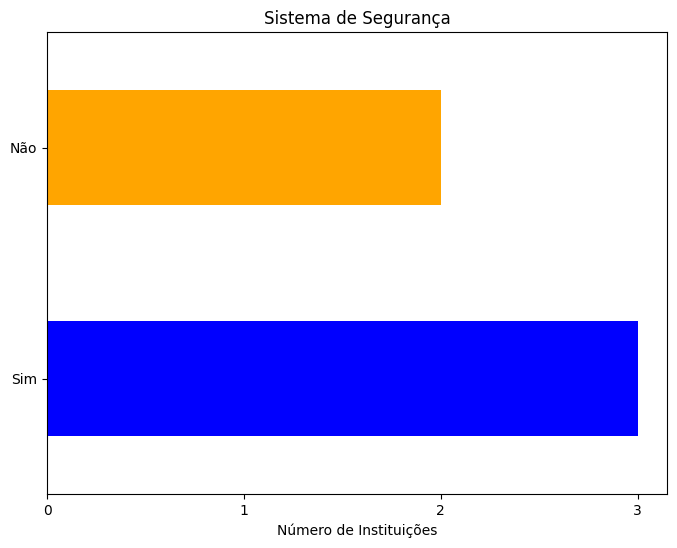

In [45]:
# Gráfico Sistemas de Segurança

# Ajusta o tamanho do gráfico (largura, altura)
plt.figure(figsize=(8, 6))

# Mapeando 1 e 2 para "Sim" e "Não"
df_filtered = df['secutiry_system'].map({1: 'Sim', 2: 'Não'})

# Contando os valores
counts = df_filtered.value_counts()

# Criando o gráfico de barras horizontais
counts.plot(kind='barh', color=['blue', 'orange'])

# Garantir que o eixo X seja inteiro
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionando título e rótulos
plt.title('Sistema de Segurança')
plt.xlabel('Número de Instituições')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

## Sistemas de segurança

In [46]:
# Query para Tipos de Sistemas de Segurança
query1 = """
SELECT
    institution_name,
    TRIM(
        CASE WHEN security_device_type___1 = 1 THEN 'Alarme (incêndio/violação)' ELSE '' END ||
        CASE WHEN security_device_type___2 = 1 THEN ', Cameras interno' ELSE '' END ||
        CASE WHEN security_device_type___3 = 1 THEN ', Cameras externo' ELSE '' END ||
        CASE WHEN security_device_type___4 = 1 THEN ', Segurança (individuo)' ELSE '' END ||
        CASE WHEN security_device_type___5 = 1 THEN ', Segurança armada (indivíduo)' ELSE '' END,
        ', '
    ) AS security_device_list
FROM
    research_data;
"""

In [47]:
# Executar a query e carregar o resultado em um DataFrame
df_q1 = pd.read_sql_query(query1, conn)
df_q1

,institution_name,security_device_list
0,2,"Cameras interno, Cameras externo, Segurança (i..."
1,3,"Cameras interno, Cameras externo"
2,4,"Cameras interno, Cameras externo, Segurança (i..."
3,1,
4,5,


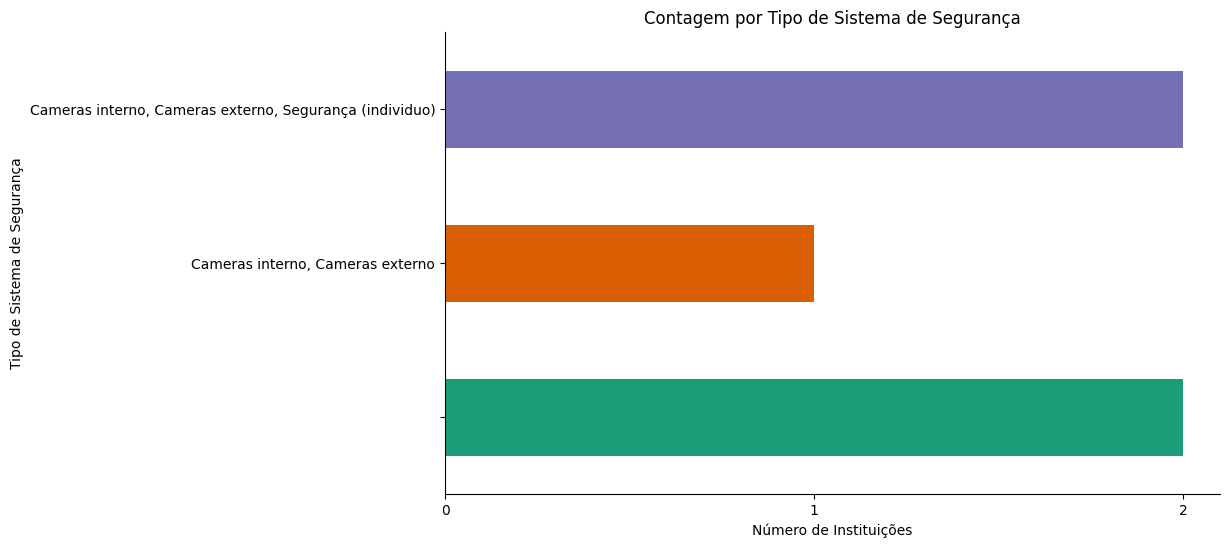

In [48]:
# Gráfico Tipos de Sistemas de Segurança

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Agrupar e plotar o gráfico de barras horizontais
df_q1.groupby('security_device_list').size().plot(
    kind='barh',
    color=sns.palettes.mpl_palette('Dark2')
)

# Ajustar bordas
plt.gca().spines[['top', 'right']].set_visible(False)

# Garantir que o eixo X seja inteiro
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Título e rótulos
plt.title('Contagem por Tipo de Sistema de Segurança')
plt.xlabel('Número de Instituições')
plt.ylabel('Tipo de Sistema de Segurança')

# Exibir gráfico
plt.show()

### Dispositivo/mecanismo (digital/analógico) de chamada que o residente/acolhido na cama possa chamar em caso de necessidade de atendimento

In [49]:
# Query dispositivo para chamada em caso de necessidade de atendimento
query_call_device = """
SELECT institution_name
FROM research_data
WHERE safety_device_availability = 1;
"""

In [50]:
# Executar a query dispositivo para chamada
df_call_device = pd.read_sql_query(query_call_device, conn)
df_call_device

,institution_name


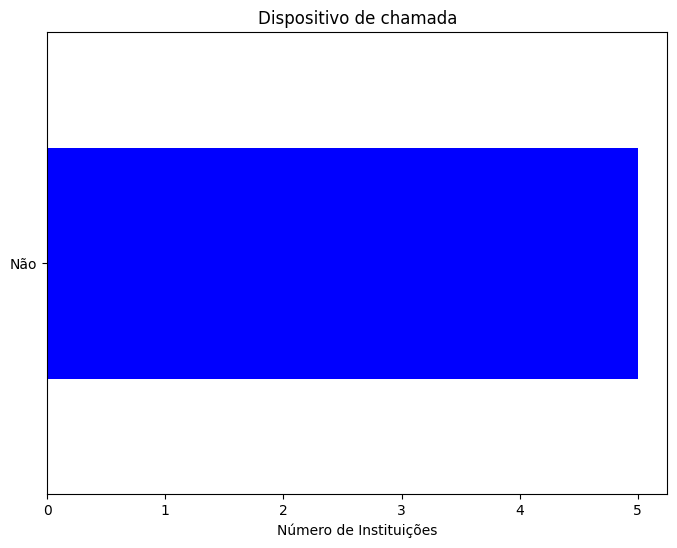

In [51]:
# Gráfico para dispositivo de chamada

plt.figure(figsize=(8, 6))

# Mapeando 1 e 2 para "Sim" e "Não"
df_filtered = df['safety_device_availability'].map({1: 'Sim', 2: 'Não'})

# Contando os valores
counts = df_filtered.value_counts()

# Criando o gráfico de barras horizontais
counts.plot(kind='barh', color=['blue', 'orange'])

# Garantir que o eixo X seja inteiro
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionando título e rótulos
plt.title('Dispositivo de chamada')
plt.xlabel('Número de Instituições')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

### Iluminação adequada

In [52]:
# Query iluminação adequada
query_light = """
SELECT institution_name
FROM research_data
WHERE lighting = 1;
"""

In [53]:
# Executando a query iluminação adequada
df_light = pd.read_sql_query(query_light, conn)
df_light

,institution_name
0,2
1,1
2,5


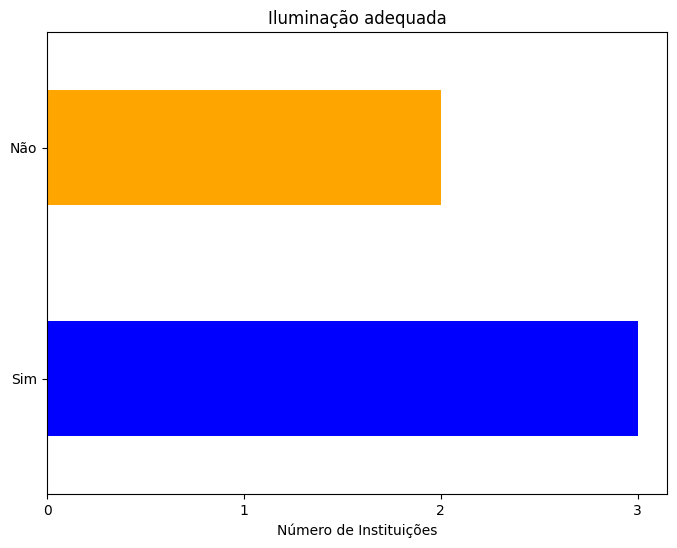

In [54]:
# Gráfico iluminação adequada
plt.figure(figsize=(8,6))

# Mapeando 1 e 2 para "Sim" e "Não"
df_filtered = df['lighting'].map({1: 'Sim', 2: 'Não'})

# Contando os valores
counts = df_filtered.value_counts()

# Criando o gráfico de barras horizontais
counts.plot(kind='barh', color=['blue', 'orange'])

# Garantir que o eixo X seja inteiro
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionando títulos e legendas
plt.title('Iluminação adequada')
plt.xlabel('Número de Instituições')
plt.ylabel('')

# Exibindo o gráfico
plt.show()